### Importing Libraries

In [125]:
import numpy as np
import pandas as pd

In [126]:
df = pd.read_csv('spam.csv')

In [127]:
df.shape

(5572, 5)

In [128]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4057,ham,Hi di is yijue we're meeting at 7 pm at esapla...,NaN,NaN,NaN
1426,ham,Ok...,NaN,NaN,NaN
1526,ham,"Wow ... I love you sooo much, you know ? I can...",NaN,NaN,NaN


### 1.Data cleaning
### 2.EDA
### 3.Text Pre-Processing
### 4. Model building
### 5.Evaluation
### 6.Improvement
### 7.Website building
### 8.Deploy

# 1. Data Cleaning

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Here we saw that last 3 columns have very less non-null count.So no need of those columns so,we need to drop the last 3 columns.

In [130]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [131]:
df.sample(5)

,v1,v2
2617,ham,I cant pick the phone right now. Pls send a me...
2266,spam,<Forwarded from 88877>FREE entry into our å£25...
2620,ham,How come?
3271,ham,"MOON has come to color your dreams, STARS to m..."
1171,spam,Got what it takes 2 take part in the WRC Rally...


### Changing the Column Names

In [132]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [133]:
df.sample(5)

,Target,Text
2761,ham,I am not sure about night menu. . . I know onl...
5387,ham,I will be gentle baby! Soon you will be taking...
3350,ham,At what time are you coming.
2872,ham,I dont understand your message.
5093,ham,Gokila is talking with you aha:)


Here (ham)- means the sms is not spam and (spam)- means it is a spam sms.So we are assigning it as 0 and 1.(0 for spam and 1 for Not spam).

In [134]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [135]:
df['Target']=encoder.fit_transform(df['Target'])

In [136]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Now We will check for missing values

In [137]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

No missing value is there.We can go to the next part.

Check for Duplicate Values

In [138]:
df.duplicated().sum()

403

In [139]:
#Removing Duplicates
df=df.drop_duplicates(keep="first")

In [140]:
df.duplicated().sum()

0

In [141]:
df.shape

(5169, 2)

# 2.EDA

In [142]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

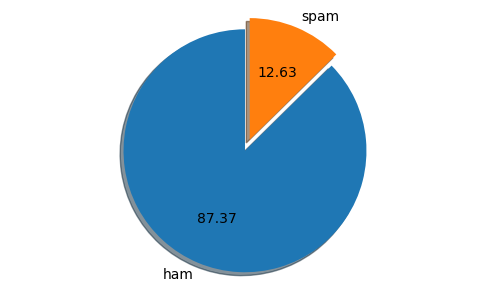

In [143]:
import matplotlib.pyplot as plt
explode=(0,0.1)
plt.figure(figsize=(5,3))
plt.pie(df['Target'].value_counts(),explode=explode,labels=['ham','spam'],autopct="%0.2f",shadow=True,startangle=90)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [144]:
import nltk

In [145]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajat.RAJAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now we will count the number of character in text and also break the Text part by each word.

In [146]:
df['Num_Char']=df["Text"].apply(len)
df["Num_Words"]=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [147]:
df.head()

,Target,Text,Num_Char,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [148]:
df["Num_Sentences"]=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [149]:
df.head()

,Target,Text,Num_Char,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [150]:
df[['Num_Char',"Num_Words","Num_Sentences"]].describe()

,Num_Char,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.453279,1.947185
std,58.236795,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [151]:
#ham
df[df["Target"]==0][["Num_Char","Num_Words","Num_Sentences"]].describe()

,Num_Char,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.120903,1.799601
std,56.358868,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [152]:
#spam
df[df["Target"]==1][["Num_Char","Num_Words","Num_Sentences"]].describe()

,Num_Char,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [153]:
import seaborn as sns

<AxesSubplot:xlabel='Num_Char', ylabel='Count'>

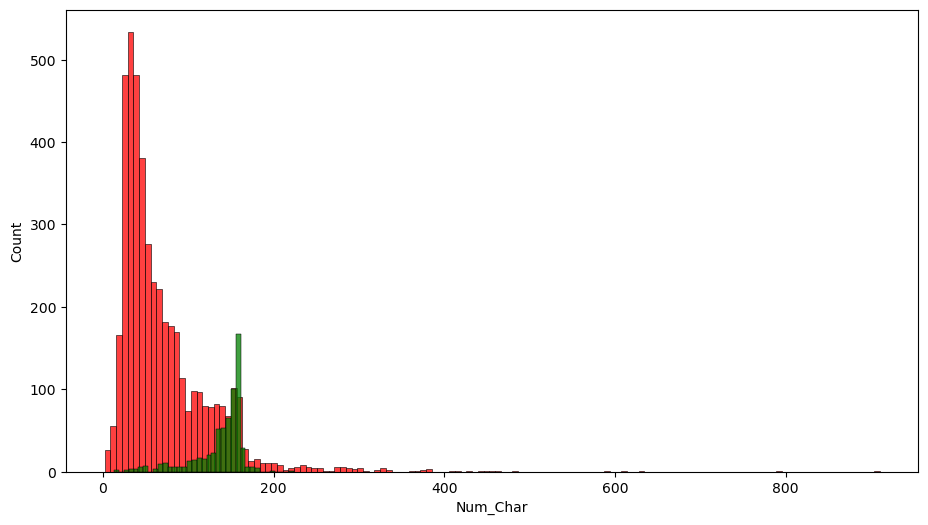

In [154]:
#Creating Histogram (Green-Not Spam,Red-Spam)

plt.figure(figsize=(11,6))
sns.histplot(df[df['Target']== 0]["Num_Char"],color='red')
sns.histplot(df[df['Target']== 1]["Num_Char"],color='green')

<AxesSubplot:xlabel='Num_Words', ylabel='Count'>

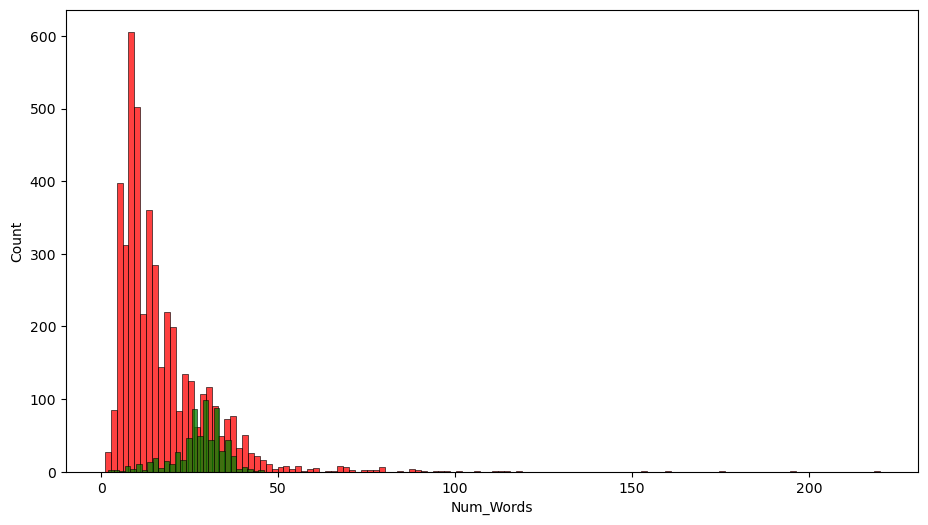

In [155]:
plt.figure(figsize=(11,6))
sns.histplot(df[df['Target']== 0]["Num_Words"],color='red')
sns.histplot(df[df['Target']== 1]["Num_Words"],color='green')

<AxesSubplot:xlabel='Num_Sentences', ylabel='Count'>

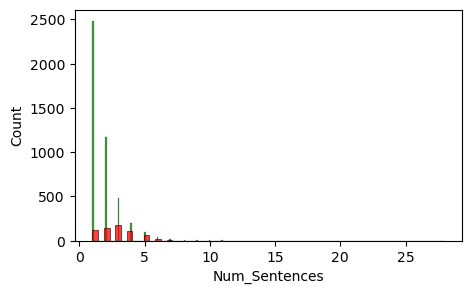

In [156]:
#Creating Histogram (Green-Not Spam,Red-Spam)

plt.figure(figsize=(5,3))
sns.histplot(df[df['Target']== 0]["Num_Sentences"],color='green')
sns.histplot(df[df['Target']== 1]["Num_Sentences"],color='red')

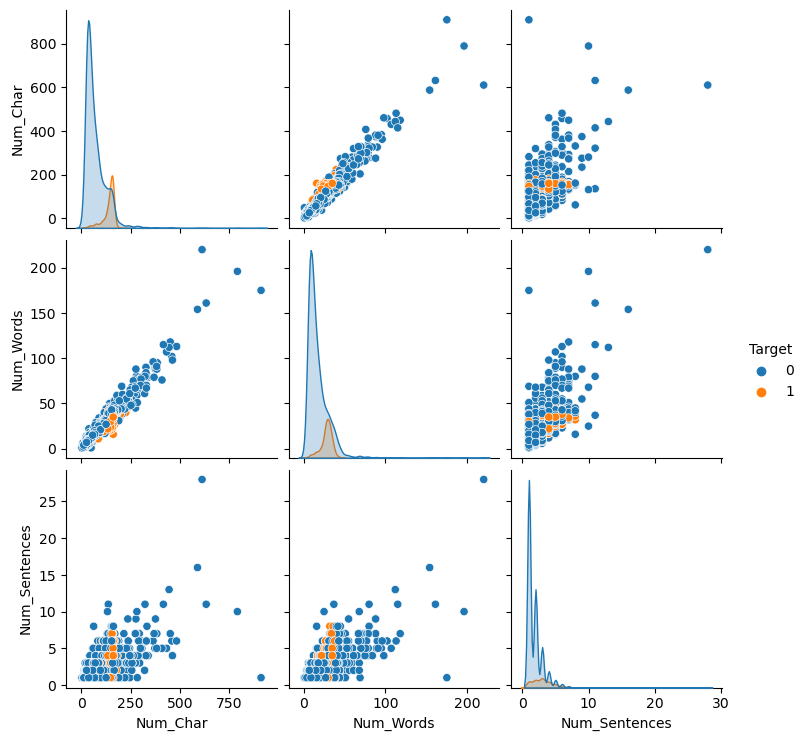

In [157]:
sns.pairplot(df,hue="Target")

<AxesSubplot:>

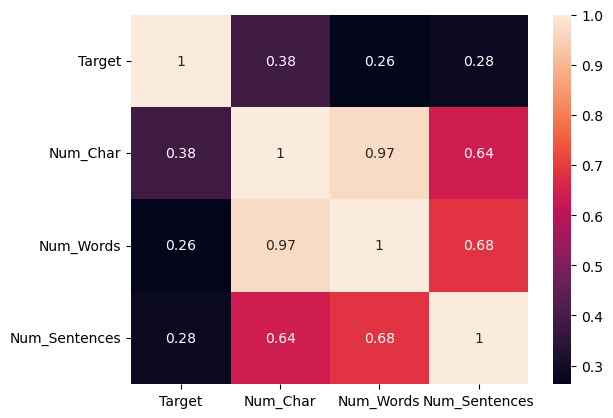

In [158]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Pre-Processing

1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.Stemming

In [159]:
import string



In [160]:
from nltk import PorterStemmer
ps=PorterStemmer()

In [161]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat.RAJAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
from nltk.corpus import stopwords

In [163]:
  def transform_text(Text):
        Text=Text.lower()
        Text=nltk.word_tokenize(Text)
        y=[]
        for i in Text:
            if i.isalnum():
                y.append(i)
        Text=y[:]
        y.clear()
        for i in Text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        Text=y[:]
        y.clear()
        for i in Text:
            y.append(ps.stem(i))
        return " ".join(y)

In [164]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [165]:
df['transformed_text']=df['Text'].apply(transform_text)

In [166]:
df.head()

,Target,Text,Num_Char,Num_Words,Num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [167]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [168]:
from wordcloud import WordCloud
wc=WordCloud(width=300,height=300,min_font_size=2,background_color='white')

In [169]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))

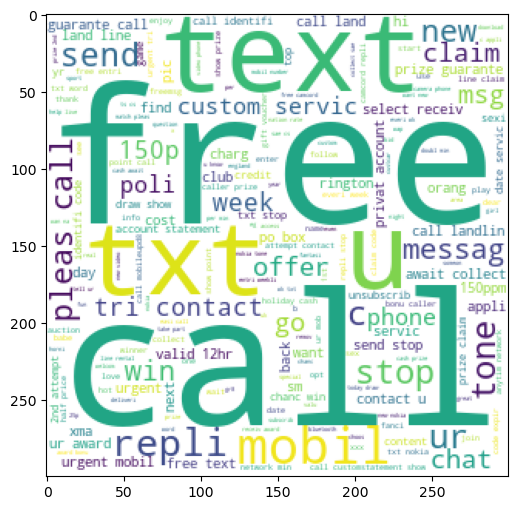

In [170]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [171]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))

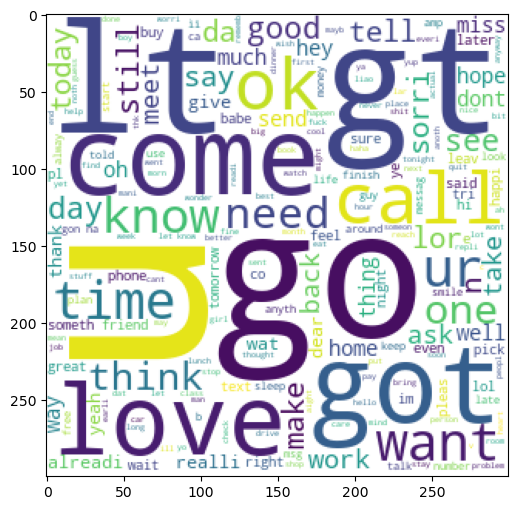

In [172]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [173]:
df.head()

,Target,Text,Num_Char,Num_Words,Num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [174]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [175]:
len(spam_corpus)

9939

C:\Users\rajat.RAJAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


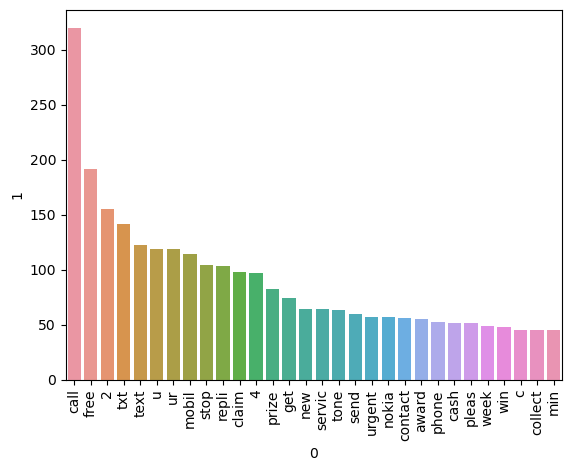

In [176]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
                                                                                                                

In [177]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [178]:
len(ham_corpus)

35394

C:\Users\rajat.RAJAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


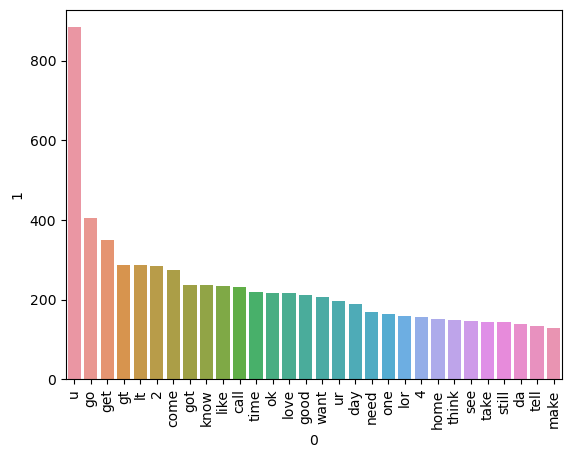

In [179]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [233]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [234]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [235]:
X.shape

(5169, 3000)

In [236]:
y=df['Target'].values

In [237]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [238]:
from sklearn.model_selection import train_test_split


In [239]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [240]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [241]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [242]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [243]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [244]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [245]:
#X1=tfidf.fit_transform(df['transformed_text']).toarray()

In [246]:
#X1.shape

In [247]:
#y1=df['Target'].values

In [248]:
#y1

In [249]:
#from sklearn.model_selection import train_test_split

In [250]:
#X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=2)

In [251]:
#from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [200]:
# gnb=GaussianNB()
#mnb=MultinomialNB()
#bnb=BernoulliNB() '''

In [252]:
#gnb.fit(X1_train,y1_train)
#y1_pred1=gnb.predict(X1_test)
#print(accuracy_score(y1_test,y1_pred1))
#print(confusion_matrix(y1_test,y1_pred1))
#print(precision_score(y1_test,y1_pred1))

In [253]:
#mnb.fit(X1_train,y1_train)
#y1_pred2=mnb.predict(X1_test)
#print(accuracy_score(y1_test,y1_pred2))
#print(confusion_matrix(y1_test,y1_pred2))
#print(precision_score(y1_test,y1_pred2))

In [254]:
#bnb.fit(X1_train,y1_train)
#y1_pred3=bnb.predict(X1_test)
#print(accuracy_score(y1_test,y1_pred3))
#print(confusion_matrix(y1_test,y1_pred3))
#print(precision_score(y1_test,y1_pred3))

tfidf-->mnb

In [204]:
import sys
!{sys.executable} -m pip install xgboost

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [256]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [257]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [258]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [259]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [260]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [261]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\rajat.RAJAT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [266]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [267]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [268]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [269]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


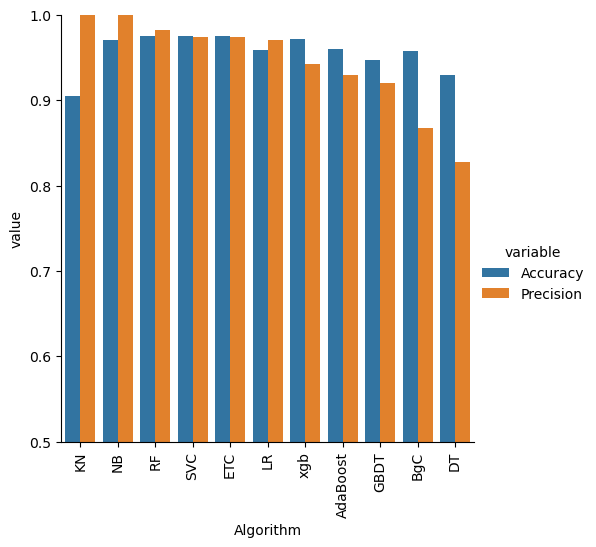

In [270]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


# 6.Model Improvement

### 1. Change the max_features parameter of TfIdf

In [271]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [272]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [273]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [274]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [275]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [276]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [277]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [278]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [279]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [280]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [281]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [282]:
from sklearn.ensemble import StackingClassifier

In [283]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [284]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [286]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 1.0


In [288]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))